In [7]:
route = [('London', -0.1276474, 51.5073219),
         ('Suez', 32.537086, 29.974498),
         ('Bombay', 72.8882172, 19.1334321),
         ('Calcutta', 88.3476023, 22.5677459),
         ('Hong Kong', 114.1628131, 22.2793278),
         ('Yokohama', 139.636768, 35.444991),
         ('San Francisco', -122.4629897, 37.7647993),
         ('New York City', -73.9866136, 40.7306458),
         ('London', -0.1276474, 51.5073219)]

In [8]:
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader('resources/1880_countries/cntry1880.shp')
countries = list(reader.records())

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [18]:
import fiona 
collection = list(fiona.open('resources/1880_countries/cntry1880.shp','r'))

In [23]:
from shapely.geometry import shape    

geoms = [shape(c['geometry']) for c in collection]

<IPython.core.display.Javascript object>


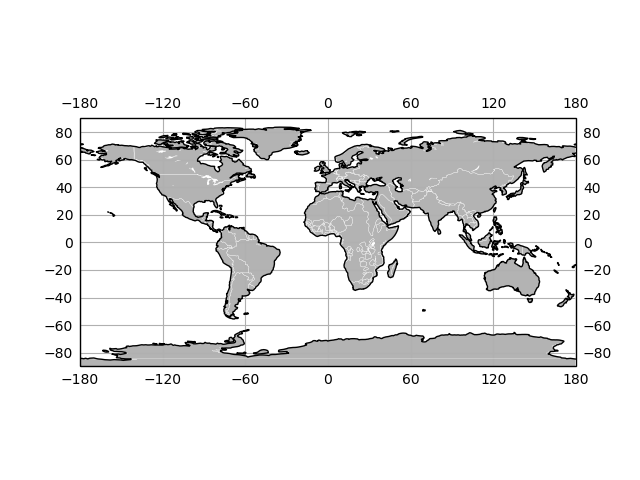

In [28]:
%matplotlib notebook

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader('resources/1880_countries/cntry1880.shp')
countries = list(reader.records())

import cartopy.feature

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

ax.gridlines(draw_labels=True, zorder=1)

ax.add_feature(cartopy.feature.LAND, facecolor=[0.7, 0.7, 0.7], edgecolor='none')
ax.add_feature(cartopy.feature.LAKES, facecolor='white', edgecolor='none')

countries = countries[:2] + countries[5:]
# TODO: What is the problem here when geodetic? (A LinearRing must have at least 3 coordinate tuples)
ax.add_geometries([country.geometry.buffer(0.0001) for country in countries],
                  ccrs.Geodetic(), facecolor='none', edgecolor='white', linewidth=0.2)
# ax.add_geometries(geoms,
#                   ccrs.PlateCarree(), facecolor='none', edgecolor='white', linewidth=0.2)
ax.coastlines()

plt.show()

In [29]:
import os.path
import matplotlib.font_manager as fm

fpath = "resources/freebooter-font/FREEBSC_.ttf"
prop = fm.FontProperties(fname=fpath)

<IPython.core.display.Javascript object>


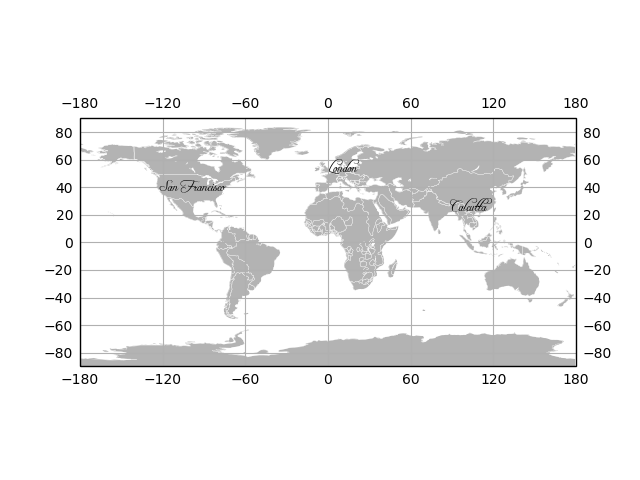

London
Calcutta
San Francisco


In [32]:
%matplotlib notebook

import cartopy.feature

ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.set_global()

ax.add_feature(cartopy.feature.LAND, facecolor=[0.7, 0.7, 0.7], edgecolor='none')
ax.add_feature(cartopy.feature.LAKES, facecolor='white', edgecolor='none')

ax.add_geometries([country.geometry for country in countries],
                  ccrs.PlateCarree(), facecolor='none', edgecolor='white', linewidth=0.2)
# ax.coastlines()

# props = dict(boxstyle='round', facecolor='white', alpha=0.5)
props = {}
for place, lon, lat in route[::3]:
    ax.text(lon, lat, place, fontproperties=prop, fontsize=10, weight='black')
    print(place)
#     break

plt.show()